### Generate the PATH of raman mapping

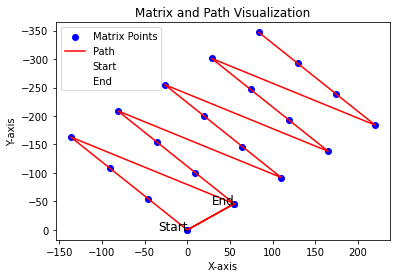

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

def generate_matrix(size, spacing):
    rows, cols = size
    x = np.arange(0, rows * spacing, spacing)
    y = np.arange(0, cols * spacing, spacing)
    X, Y = np.meshgrid(x, y)
    matrix_points = list(zip(X.ravel(), Y.ravel()))
    return matrix_points

def generate_path(matrix_points):
    # 这里你可以实现路径生成算法，例如最短路径算法
    # 这里我简单地按顺序访问点
    path = matrix_points.copy()
    return path

def plot_matrix_and_path(matrix_points, path, start, end,point_spacing=0):
    
    marker_size = point_spacing * 4
    x, y,_ = zip(*matrix_points)
    plt.scatter(x, y, c='blue', label='Matrix Points')
    
    path_x, path_y,_ = zip(*path)
    plt.plot(path_x, path_y, c='red', label='Path')
    plt.gca().invert_yaxis()
    # 添加起始点和终点的标签和文字
    plt.scatter(start[0], start[1], c='green', marker='o',s=marker_size, label='Start')
    plt.text(start[0], start[1], 'Start', fontsize=12, ha='right')
    
    plt.scatter(end[0], end[1], c='purple', marker='*',s=marker_size, label='End')
    plt.text(end[0], end[1], 'End', fontsize=12, ha='right')
    
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    plt.title('Matrix and Path Visualization')
    
    plt.show()

    
def draw_the_whole_map(points_list):
    path = generate_path(points_list)
    start_point = points_list[0]
    end_point = points_list[1]
    plot_matrix_and_path(points_list,path,start_point,end_point)
    
def matrix_move_to_origin(points_list):
    substact_point = points_list[0]
    substact_point_x = substact_point[0]
    substact_point_y = substact_point[1]
    matrix_points_original = [(x-substact_point_x,y-substact_point_y,z) for x,y,z  in points_list]
    return matrix_points_original
def write_infile_map_matrix(points_list):
    with open('scanning_points.txt', 'w') as f:
        for point in points_list:
            f.write(f"{point}\n")
# 设置矩阵大小和点间距
matrix_size = (5, 4)
point_spacing = 40.0

# 生成矩阵点
matrix_points = generate_matrix(matrix_size, point_spacing)

matrix_points2 =[(437, 538, 61), (492, 492, 62), (437.0, 538.0, 64), (391.53550369747825, 483.64027616002835, 65), (346.07100739495644, 429.28055232005664, 66), (300.6065110924347, 374.920828480085, 67), (492.00534889376416, 491.99552637976086, 68), (446.5408525912424, 437.6358025397892, 69), (401.0763562887206, 383.2760786998175, 70), (355.61185998619885, 328.9163548598458, 71), (547.0106977875283, 445.9910527595217, 72), (501.5462014850066, 391.63132891955007, 73), (456.0817051824848, 337.2716050795784, 74), (410.617208879963, 282.9118812396067, 75), (602.0160466812926, 399.98657913928264, 76), (556.5515503787708, 345.62685529931093, 77), (511.087054076249, 291.2671314593393, 78), (465.6225577737272, 236.90740761936758, 79), (657.0213955750567, 353.98210551904344, 80), (611.5568992725349, 299.6223816790718, 81), (566.0924029700132, 245.26265783910014, 82), (520.6279066674914, 190.90293399912844, 83)
                ]
substact_point = [(437, 538, 61)]
substact_point_x = substact_point[0][0]
substact_point_y = substact_point[0][1]

matrix_points_original = matrix_move_to_origin(matrix_points2)

draw_the_whole_map(matrix_points_original)

write_infile_map_matrix(matrix_points_original)



In [27]:
print(end_point)
print(matrix_points)

(160.0, 120.0)
[(0.0, 0.0), (40.0, 0.0), (80.0, 0.0), (120.0, 0.0), (160.0, 0.0), (0.0, 40.0), (40.0, 40.0), (80.0, 40.0), (120.0, 40.0), (160.0, 40.0), (0.0, 80.0), (40.0, 80.0), (80.0, 80.0), (120.0, 80.0), (160.0, 80.0), (0.0, 120.0), (40.0, 120.0), (80.0, 120.0), (120.0, 120.0), (160.0, 120.0)]


### Short PATH algorithm

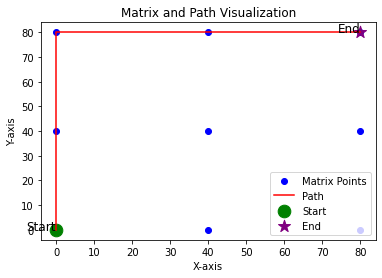

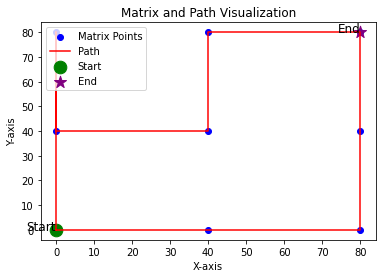

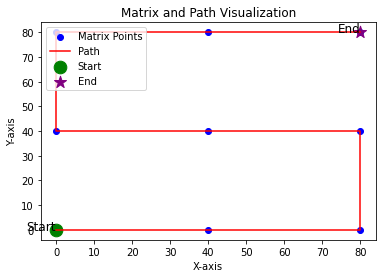

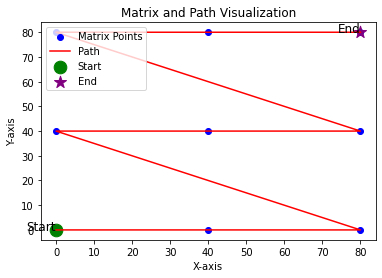

In [77]:
from queue import PriorityQueue
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog
from itertools import permutations


def generate_matrix(size, spacing):
    rows, cols = size
    x = np.arange(0, rows * spacing, spacing)
    y = np.arange(0, cols * spacing, spacing)
    X, Y = np.meshgrid(x, y)
    matrix_points = list(zip(X.ravel(), Y.ravel()))
    return matrix_points

def generate_path(matrix_points):
    # 这里你可以实现路径生成算法，例如最短路径算法
    # 这里我简单地按顺序访问点
    path = matrix_points.copy()
    return path

def plot_matrix_and_path(matrix_points, path, start, end,point_spacing):
    
    marker_size = point_spacing * 4
    x, y = zip(*matrix_points)
    plt.scatter(x, y, c='blue', label='Matrix Points')
    
    path_x, path_y = zip(*path)
    plt.plot(path_x, path_y, c='red', label='Path')
    
    # 添加起始点和终点的标签和文字
    plt.scatter(start[0], start[1], c='green', marker='o',s=marker_size, label='Start')
    plt.text(start[0], start[1], 'Start', fontsize=12, ha='right')
    
    plt.scatter(end[0], end[1], c='purple', marker='*',s=marker_size, label='End')
    plt.text(end[0], end[1], 'End', fontsize=12, ha='right')
    
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    plt.title('Matrix and Path Visualization')
    
    plt.show()


def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def get_neighbors(point, matrix_points,point_spacing):
    neighbors = []
    for dx, dy in [(0, point_spacing), (point_spacing, 0), (0, -point_spacing), (-point_spacing, 0)]:
        neighbor = (point[0] + dx, point[1] + dy)
        if neighbor in matrix_points:
            neighbors.append(neighbor)
    return neighbors

def a_star_search(matrix_points, start, end,point_spacing):
    if start not in matrix_points or end not in matrix_points:
        return []

    frontier = PriorityQueue()
    frontier.put((0, start))
    came_from = {}
    cost_so_far = {}
    came_from[start] = None
    cost_so_far[start] = 0
    
    while not frontier.empty():
        _, current = frontier.get()
        
        if current == end:
            break
        
        for next in get_neighbors(current, matrix_points,point_spacing):
            new_cost = cost_so_far[current] + heuristic(current, next)
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                priority = new_cost + heuristic(end, next)
                frontier.put((priority, next))
                came_from[next] = current
                
    path = []
    current = end
    while current is not None and current != start:
        path.append(current)
        current = came_from.get(current, None)
    if current is not None:
        path.append(start)
        path.reverse()
    
    return path


def nearest_neighbor(matrix_points, start):
    unvisited = set(matrix_points)
    current = start
    path = [current]
    unvisited.remove(current)

    while unvisited:
        nearest = min(unvisited, key=lambda x: heuristic(current, x))
        path.append(nearest)
        current = nearest
        unvisited.remove(current)

    path.append(start)  # 返回到起始点
    return path
def total_distance(path):
    distance = 0
    for i in range(len(path) - 1):
        distance += heuristic(path[i], path[i+1])
    return distance

def traveling_salesman(matrix_points, start):
    shortest_path = None
    shortest_distance = float('inf')
    
    for path in permutations(matrix_points):
        if path[0] == start:
            current_distance = total_distance(path)
            if current_distance < shortest_distance:
                shortest_distance = current_distance
                shortest_path = path
                
    return shortest_path

    

# 设置矩阵大小和点间距
matrix_size = (3, 3)

point_spacing = 40.0

# 生成矩阵点
matrix_points = generate_matrix(matrix_size, point_spacing)
# 使用A*算法生成路径
# 设置起始点和终点坐标
start_point = (0, 0)
end_point = ((matrix_size[0]-1) * point_spacing, (matrix_size[1]-1) * point_spacing)

path = a_star_search(matrix_points, start_point, end_point,point_spacing)
# 绘制矩阵和路径，带有不同的标签和文字

path2 = nearest_neighbor(matrix_points,start_point)

path3 = traveling_salesman(matrix_points,start_point)

path4 = generate_path(matrix_points)
                      
plot_matrix_and_path(matrix_points, path, start_point, end_point, point_spacing)


plot_matrix_and_path(matrix_points, path2, start_point, end_point, point_spacing)


plot_matrix_and_path(matrix_points, path3, start_point, end_point, point_spacing)
plot_matrix_and_path(matrix_points, path4, start_point, end_point, point_spacing)


### coding for movement

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

def generate_matrix(size, spacing):
    rows, cols = size
    x = np.arange(0, rows * spacing, spacing)
    y = np.arange(0, cols * spacing, spacing)
    X, Y = np.meshgrid(x, y)
    matrix_points = list(zip(X.ravel(), Y.ravel()))
    return matrix_points

def generate_path(matrix_points):
    # 这里你可以实现路径生成算法，例如最短路径算法
    # 这里我简单地按顺序访问点
    path = matrix_points.copy()
    return path

def plot_matrix_and_path(matrix_points, path, start, end,point_spacing):
    
    marker_size = point_spacing * 4
    x, y,_ = zip(*matrix_points)
    plt.scatter(x, y, c='blue', label='Matrix Points')
    
    path_x, path_y,_ = zip(*path)
    plt.plot(path_x, path_y, c='red', label='Path')
    plt.gca().invert_yaxis()
    # 添加起始点和终点的标签和文字
    plt.scatter(start[0], start[1], c='green', marker='o',s=marker_size, label='Start')
    plt.text(start[0], start[1], 'Start', fontsize=12, ha='right')
    
    plt.scatter(end[0], end[1], c='purple', marker='*',s=marker_size, label='End')
    plt.text(end[0], end[1], 'End', fontsize=12, ha='right')
    
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    plt.title('Matrix and Path Visualization')
    
    plt.show()

# 设置矩阵大小和点间距
matrix_
point_spacing = 40.0

# 生成矩阵点
matrix_points = generate_matrix(matrix_size, point_spacing)

matrix_points2 =[(437, 538, 61), (492, 492, 62), (437.0, 538.0, 64), (391.53550369747825, 483.64027616002835, 65), (346.07100739495644, 429.28055232005664, 66), (300.6065110924347, 374.920828480085, 67), (492.00534889376416, 491.99552637976086, 68), (446.5408525912424, 437.6358025397892, 69), (401.0763562887206, 383.2760786998175, 70), (355.61185998619885, 328.9163548598458, 71), (547.0106977875283, 445.9910527595217, 72), (501.5462014850066, 391.63132891955007, 73), (456.0817051824848, 337.2716050795784, 74), (410.617208879963, 282.9118812396067, 75), (602.0160466812926, 399.98657913928264, 76), (556.5515503787708, 345.62685529931093, 77), (511.087054076249, 291.2671314593393, 78), (465.6225577737272, 236.90740761936758, 79), (657.0213955750567, 353.98210551904344, 80), (611.5568992725349, 299.6223816790718, 81), (566.0924029700132, 245.26265783910014, 82), (520.6279066674914, 190.90293399912844, 83)
                ]
path = generate_path(matrix_points)
path2 =generate_path(matrix_points2)

# 设置起始点和终点坐标
# start_point = (0, 0)
# end_point = ((matrix_size[0]-1) * point_spacing, (matrix_size[1]-1) * point_spacing)

start_point = matrix_points2[0]
end_point = matrix_points2[-1]
# 绘制矩阵和路径，带有不同的标签和文字
#plot_matrix_and_path(matrix_points, path, start_point, end_point,point_spacing)
plot_matrix_and_path(matrix_points2, path2, start_point, end_point,point_spacing)
